# Initial Code Explanation
## Traveling Salesman Problem
Amirali Amini 610399102


In this problem, the salesperson must visit all points and return to the starting point, minimizing the total distance traveled while visiting each point only once. Due to its computational complexity, this problem is classified as NP-hard, meaning that optimizing it for large instances is very time-consuming and challenging. Therefore, to solve the Traveling Salesman Problem, heuristic algorithms such as genetic algorithms, simulated annealing, ant colony optimization, and others are employed. These algorithms seek near-optimal solutions rather than the exact optimal solution.


In this question, I will solve the problem using the Ant Colony Algorithm and compare it a bit with the Genetic Algorithm. First, I will import the necessary libraries, which include NumPy for speeding up calculations, Random for introducing randomness into operations, and Math for the Euclidean distance function used in finding distances.


In [41]:
import random
import numpy as np
from math import sqrt,ceil

## init

To implement the algorithm, I used a class to test both provided test cases without needing to copy the code repeatedly. In the `init` function, I performed the initial setup and created the initial population completely randomly. I calculated the initial fitness, and so on.


## calcFitness

In the `calcFitness` function, I calculated the fitness value for each ant's path and returned its inverse. I believe this is a suitable fitness function, as mentioned in the course materials.


## way_creator

In this function, a new path taken by each ant is generated based on the city selector function, which I will explain below.


## citySelector

In this function, the next node in the path is determined from the unseen neighbors of the current node. The resulting node depends on the pheromone levels between the two nodes and their distance, each raised to the power of the values alpha and beta. Since pheromone levels drop below one after a certain point, I set alpha to less than one to enhance the effect of pheromones and thus increase fitness. For beta, since the distance between two nodes is not smaller than one, its inverse will also be less than one. To increase exploration, I set beta to greater than one, which allows for more attention to promising paths.

To select the next city, we assign a probability to each of the neighbors using the aforementioned method and then use the `random.choices` function to choose one.


## new_iteration

In this function, new paths are generated for each ant. After creating the paths, we calculate the fitness of the constructed paths and evaporate the pheromones randomly by 15% to 25%. The following functions are used for this purpose:


## pheromoneAdder

In this function, we update the pheromones of the path based on the route taken by the ant. The increase in pheromone levels is primarily determined by the fitness of the path. Specifically, the pheromone added is equal to the inverse of the path length.


## evapMatrix

In this function, the pheromone levels are evaporated in the manner previously described, with random values ranging from 0.15 to 0.25. The reason for selecting this range is to facilitate significant evaporation, thereby enhancing the overall effectiveness.


## prnt and pMatrix

These two functions are used to print the class values for testing functionality, and their purpose is quite clear.


## Explanation of Values

In general, I found that increasing the pheromone level led to better results for this problem. While enhancing the initial pheromone concentration did improve the results by a few percentage points due to increased exploration, the improvements were not significant. 

I tested pheromone values of 0.5, 1, and 2, with 2 yielding the best results. For the alpha and beta parameters, I experimented with values of 1, 2, 10, 50, 100, 0.001, and 0.01 for alpha, and values of 10, 100, 1, 2, 20, 15, and 0.5 for beta. The best results were achieved with an alpha value of 0.01 for the first test case and an alpha value of 1 for the second test case, while beta values of 50 worked well for both test cases.

I also tested various population sizes ranging from 1 to 500 for the first test case, with a population size of 50 yielding the best and fastest results. The same population size of 50 also performed well for the second test case.


In [46]:
class ants : 
    def __init__(self , pop_size ,coordinates ) -> None:
        self.pop_size = pop_size
        self.city_size = len(coordinates)   
        self.population = [list(random.sample(range(self.city_size) , self.city_size)) for _ in range(self.pop_size) ]
        self.coordinates = coordinates 
        self.distance_matrix = [ [sqrt( (coordinates[i][0] - coordinates[j][0])**2 +(coordinates[i][1] - coordinates[j][1])**2 ) for i in range(self.city_size) ] for j in range(self.city_size) ]
        self.pheromone_matrix = [ [2]*self.city_size for j in range(self.city_size)]
        self.fitness_arr = [self.calcAntFitness(ant) for ant in self.population ]


    def calcAntFitness(self , ant):
        fitness = 0
        for i in range(self.city_size):
            fitness += self.distance_matrix[ant[i]][ant[(i+1) % self.city_size]]
        return 1/fitness
    

    def way_creator(self):
        seen_cities = [False]*self.city_size
        way = [0]
        seen_cities[0] = True
        for idx in range ( self.city_size -1) :
            way.append(self.city_selector(way[idx] , seen_cities))
            # print(seen_cities)
        return way



    def city_selector(self , current , neighbors , alpha = 1 , beta = 50 ):
        included_cities_idx = []
        prob_array = []
        for city_idx in range(self.city_size):
            if (not neighbors[city_idx]) and city_idx != current:
                included_cities_idx.append(city_idx)
                prob_array.append((self.pheromone_matrix[current][city_idx]** alpha )*(1/ self.distance_matrix[current][city_idx]** beta ))
        # print(prob_array)
        selected_city = random.choices(included_cities_idx, weights=prob_array)[0]
        neighbors[selected_city]  =True
        return selected_city


    def new_itration(self):
        for ant in range(self.pop_size):
            self.population[ant]=self.way_creator()
            self.fitness_arr [ant] = self.calcAntFitness(self.population[ant])
            self.phormoneAdder( self.population[ant])
        self.evapMatrix()
            

    def phormoneAdder(self , ant , adder = lambda x : x):
        ant_fitness = self.calcAntFitness(ant)
        for i in range (self.city_size):
             self.pheromone_matrix[ant[i]][ant[(i+1 ) % self.city_size]] += adder(ant_fitness)
             self.pheromone_matrix[ant[(i+1 ) % self.city_size]][ant[i]] += adder(ant_fitness)


    def evapMatrix(self , evaper = lambda x,p : x*(1-p)):
        for i in range (self.city_size -1):
            for j in range (i + 1,self.city_size):
                new_phormone = evaper (self.pheromone_matrix[i][j] , random.random()* 0.1 + 0.15)
                self.pheromone_matrix[i][j] = new_phormone
                self.pheromone_matrix[j][i] = new_phormone






    def pMatrix(self , matrix):
        for row in matrix:
            for number in row :
                print (number ,end=" ")
            print ()


    def prnt(self):
        print ('population : ' )
        self.pMatrix(self.population)
        print ()


        print ('pheromone_matrix : ' )
        self.pMatrix(self.pheromone_matrix)
        print ()

        
        print ('fitness_arr : ' , self.fitness_arr )
        print ()

        


## Input

Here, I took the input. It's quite clear what I've done.


In [319]:
test_case_file = open("gr229.txt", "r")
Lines = test_case_file.readlines()
coords=[]
for line in Lines:
    city = (list(line.split(' '))[2:])
    coords.append( ( float(city[0]) , float(city[1][:-2]) ) )
for i in coords:
    print(str(i),end='')
    

(68.58, 33.0)(64.34, 40.3)(59.55, 30.1)(59.25, 24.4)(56.57, 24.0)(54.43, 20.3)(54.41, 25.1)(53.54, 27.3)(49.5, 24.0)(50.26, 30.3)(46.28, 30.4)(55.45, 37.3)(56.2, 44.0)(55.45, 49.0)(53.12, 50.0)(51.4, 39.1)(50.0, 36.1)(48.27, 34.5)(44.36, 33.3)(47.14, 39.4)(48.44, 44.2)(46.21, 48.0)(41.43, 44.4)(40.11, 44.3)(40.23, 49.5)(58.0, 56.1)(56.51, 60.3)(67.27, 63.5)(69.2, 88.0)(55.0, 73.2)(55.02, 82.5)(56.01, 92.5)(49.5, 73.1)(43.15, 76.5)(41.2, 69.1)(39.4, 66.4)(38.35, 68.4)(43.48, 87.3)(52.16, 104.2)(47.55, 106.5)(52.03, 113.3)(62.13, 129.4)(64.45, 177.2)(53.01, 158.3)(59.34, 150.4)(50.17, 127.3)(50.35, 137.0)(48.27, 135.0)(46.58, 142.4)(43.1, 131.5)(41.01, 28.5)(38.25, 27.0)(39.56, 32.5)(38.43, 35.3)(39.45, 37.0)(39.55, 41.1)(37.55, 40.1)(37.01, 35.1)(36.12, 37.1)(34.44, 36.4)(33.3, 36.1)(33.53, 35.3)(31.57, 35.5)(32.5, 35.0)(32.04, 34.4)(31.46, 35.1)(24.28, 39.3)(21.3, 39.1)(21.27, 39.4)(15.23, 44.1)(14.48, 42.5)(12.45, 45.1)(14.32, 49.0)(23.37, 58.3)(25.18, 55.1)(25.17, 51.3)(26.13, 50.3)(

Here, I created an instance of the class so that I can obtain the path with it.


In [320]:
test = ants(50,coords)
test.prnt()

population : 
156 127 72 179 222 55 118 201 43 226 181 186 227 38 169 87 97 17 22 8 35 121 93 19 134 185 84 191 0 5 82 18 11 49 2 173 16 74 151 60 142 193 63 178 79 90 189 128 214 103 64 25 27 92 140 184 149 144 131 54 155 204 13 152 120 46 211 162 172 182 148 47 6 12 224 163 203 216 41 21 114 34 61 70 132 32 102 36 76 81 28 50 111 37 86 3 117 223 202 198 153 68 57 207 147 197 30 9 109 94 164 192 135 157 154 95 213 4 220 96 133 141 83 110 53 210 75 45 209 129 160 174 73 98 15 196 150 108 115 48 77 137 20 171 44 143 200 212 7 58 99 119 228 215 205 166 177 208 221 112 23 161 39 59 180 26 40 85 218 51 100 139 124 183 122 31 225 195 89 105 145 24 159 125 165 126 138 33 123 29 194 136 71 188 167 206 176 175 219 170 10 80 69 217 130 187 56 62 88 65 101 91 146 78 106 116 168 107 1 67 104 14 190 113 66 158 52 42 199 
23 195 160 122 147 0 72 168 104 108 57 189 183 67 188 154 114 77 185 212 98 186 209 97 222 64 105 21 132 161 123 49 205 164 62 10 128 208 182 34 81 35 102 19 140 152 2 58 201 141 

## Graph

Here, in addition to creating a new iteration, I also saved the value of each iteration so that I can plot my graph with it.


It reached a very good result in a surprisingly short time. 

It's truly remarkable compared to the genetic algorithm, which was much slower.


In [321]:
ith_itration = 0
x=[]
y=[]

while (1/max(test.fitness_arr))>1840:
    print(1/max(test.fitness_arr))
    x.append(ith_itration)
    y.append(1/max(test.fitness_arr))
    test.new_itration()
    ith_itration +=1
print(1/max(test.fitness_arr))
x.append(ith_itration)
y.append(1/max(test.fitness_arr))

14280.157165341878
1850.27813723519
1868.4200991887258
1851.18059016856
1875.7692713900728
1878.0969836280617
1863.1501461752712
1854.73005098276
1893.9365758875779
1876.3963838707775
1879.1846720899318
1848.1443218000954
1889.923500050695
1855.5334034550672
1875.0949979841885
1907.2672082912084
1887.7813663893867
1892.7902121034394
1825.5927952076224


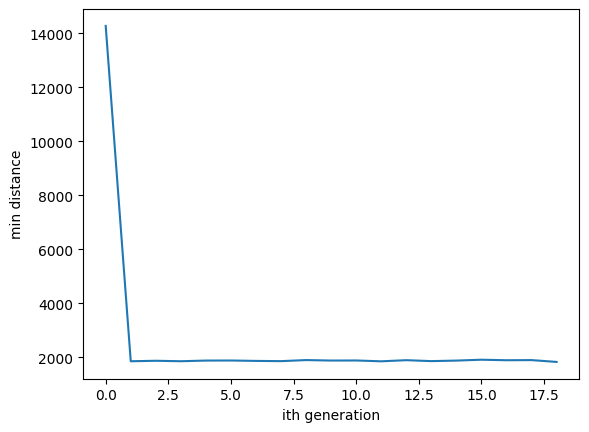

In [322]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel("ith generation")
plt.ylabel("min distance")
plt.show()

In [47]:
test_case_file = open("pr1002.txt", "r")
Lines = test_case_file.readlines()
coords100=[]
for line in Lines:
    city = (list(line.split(' '))[1:])
    coords100.append( ( float(city[0]) , float(city[1]) ) )
for i in coords100:
    print(str(i),end='')

(1150.0, 4000.0)(1050.0, 2750.0)(1150.0, 2250.0)(1250.0, 2050.0)(1350.0, 2350.0)(1050.0, 1550.0)(3350.0, 1700.0)(3450.0, 1450.0)(3550.0, 1600.0)(3950.0, 1700.0)(4050.0, 2000.0)(4050.0, 2150.0)(4250.0, 1650.0)(4150.0, 1500.0)(4450.0, 1450.0)(4400.0, 1700.0)(4600.0, 1850.0)(4900.0, 1550.0)(5100.0, 1550.0)(5350.0, 1450.0)(4950.0, 1700.0)(4850.0, 1900.0)(4900.0, 2050.0)(5000.0, 2150.0)(5100.0, 2050.0)(5400.0, 2050.0)(5750.0, 2000.0)(5900.0, 2050.0)(5600.0, 2250.0)(5400.0, 2300.0)(5250.0, 2250.0)(5000.0, 2350.0)(5000.0, 2550.0)(5050.0, 2800.0)(5250.0, 2750.0)(5450.0, 2750.0)(5400.0, 2950.0)(5200.0, 3150.0)(5050.0, 3100.0)(4950.0, 3300.0)(5100.0, 3600.0)(5200.0, 3650.0)(5350.0, 3750.0)(5450.0, 3750.0)(5600.0, 3750.0)(5600.0, 4250.0)(5450.0, 4250.0)(5350.0, 4150.0)(5050.0, 3800.0)(4950.0, 3500.0)(4700.0, 3500.0)(4400.0, 3700.0)(4450.0, 3500.0)(4100.0, 3500.0)(4150.0, 3300.0)(4100.0, 3150.0)(4300.0, 3300.0)(4500.0, 3150.0)(4500.0, 2950.0)(4700.0, 3000.0)(4700.0, 2800.0)(4700.0, 2500.0)(4600.0,

In [48]:
test1000 = ants(10,coords100)
test1000.prnt()

population : 
780 877 997 24 781 622 639 631 621 655 293 16 326 576 43 888 699 575 450 538 1001 59 280 556 931 588 128 969 367 673 56 294 751 136 814 94 3 787 363 401 833 473 640 983 583 875 97 599 82 678 387 27 869 560 114 267 813 649 784 838 26 752 244 268 506 463 51 509 860 248 604 937 231 569 73 71 837 945 688 165 384 891 812 899 561 801 178 2 184 325 90 716 840 763 208 368 648 68 48 792 72 924 58 250 164 156 152 564 177 643 865 850 183 915 425 558 470 307 709 32 498 620 821 836 504 980 632 799 98 439 501 397 854 733 298 308 359 878 38 776 162 548 808 170 437 1 845 289 893 571 209 510 60 454 445 320 258 205 20 672 76 800 625 666 690 70 982 903 14 602 211 841 817 864 372 818 592 358 441 417 855 938 306 906 157 713 127 135 386 256 0 131 105 35 290 279 715 159 272 909 744 654 261 511 615 804 545 777 552 986 140 410 723 524 319 192 429 181 743 190 708 761 563 346 881 45 47 941 712 750 824 120 933 912 447 542 398 939 749 467 423 356 465 683 1000 265 103 684 195 225 186 362 9 962 517 493

For this reason, I noticed that the results were quite low on the net, so I manually stopped when it got close to those answers and saw that the fluctuations were minimal.

However, I believe the result obtained is quite good and relatively quickly reached this proximity.


Overall, from what I understand, the ant colony algorithm performs much better than the genetic algorithm if the problem can be transformed accordingly.


In [49]:
ith_itration = 0
x1000=[]
y1000=[]

while (1/max(test1000.fitness_arr))>1840:
    print(1/max(test1000.fitness_arr))
    x1000.append(ith_itration)
    y1000.append(1/max(test1000.fitness_arr))
    test1000.new_itration()
    ith_itration +=1
print(1/max(test1000.fitness_arr))
x1000.append(ith_itration)
y1000.append(1/max(test1000.fitness_arr))

6391551.815670786
317353.92333866033
318400.5148969102
315187.6234617398
314996.6296734799
319330.78122901084
316955.1626873341
315946.2667098707
314698.3765074766
318789.63000536495
316814.0054144809
314093.6410933514
326448.72559026186
320396.32303595694
318450.4994523477
314403.4764084726
321358.58097407647
314826.93828478706
314330.9891537914
318530.16071315337
315503.5785648134
313452.10671956104
315600.5113815594
320147.1100079531
311732.3696614728
321670.7609041493
324910.1585742715
317414.06966658507
319157.4560478238
320141.7972443637
319145.5396034291
316693.63325944054
318103.5579218739
308404.2538473747
314270.36880062567
313829.15134941315
320090.28368082823
321401.73735159205
317389.9841848271
318937.62604499044
316727.5300651888
320806.6577842903
321171.4650546571
317239.80804202077
315092.6368436557
323472.8396064589
322968.83733087435
314737.10996636486
316725.39645730605
317962.44222433557
316790.74253477115
317247.0724061665
319906.9381260622
317613.1349126035
316252

KeyboardInterrupt: 

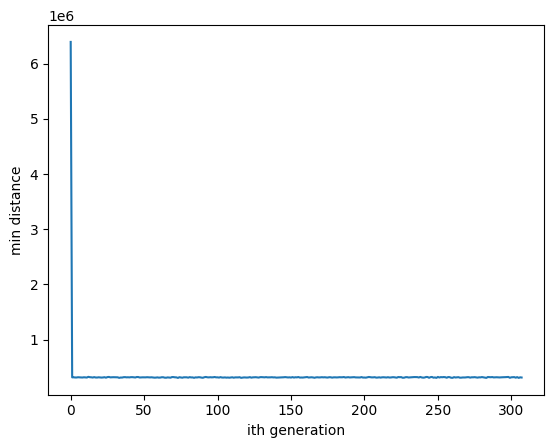

In [50]:
import matplotlib.pyplot as plt

plt.plot(x1000, y1000)
plt.xlabel("ith generation")
plt.ylabel("min distance")
plt.show()